In [14]:
import numpy as np
import pandas as pd
#importing libs
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.api import qqplot
from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


#knn regression and scaling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#logistic regression threshold finding
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
#creating the new dataframe
df = pd.read_csv(r"C:\Users\Brand\OneDrive\Documents\Csv Data\Credit data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [16]:
#exploring and analysising my data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
#Showing distribution default payments
df = df.rename(columns={'default payment next month': 'default_payment_next_month'})
df['default_payment_next_month'].value_counts(normalize=True)
#Creating a variable that averages the bill balences and the amount paid
df['avg_balance'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['total_payment'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
#creating weighted variable that tookin 
weights = [6, 5, 4, 3, 2, 1]  # PAY_0 (Sept) to PAY_6 (Apr)
df['weighted_pay_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']].mul(weights, axis=1).sum(axis=1) / sum(weights)

In [18]:
#overall review of the statistics
logit_overview = logit('default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + avg_balance + total_payment + weighted_pay_delay', data = df).fit()
print(logit_overview.summary())


Optimization terminated successfully.
         Current function value: 0.473933
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29991
Method:                                   MLE   Df Model:                            8
Date:                        Wed, 07 May 2025   Pseudo R-squ.:                  0.1031
Time:                                15:04:03   Log-Likelihood:                -14218.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.640

In [ ]:
logit2_overview = logit('default_payment_next_month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 ', data = df).fit()
print(logit2_overview.summary())

         Current function value: 0.464620
         Iterations: 35
                               Logit Regression Results                               
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29974
Method:                                   MLE   Df Model:                           25
Date:                        Wed, 07 May 2025   Pseudo R-squ.:                  0.1207
Time:                                15:05:57   Log-Likelihood:                -13939.
converged:                              False   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6863      0.119     -5.784      0.000  

c:\Users\Brand\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#preparing the lostic regression 
x1 = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','avg_balance', 'total_payment','weighted_pay_delay']].values
y1 = df['default_payment_next_month'].values
#figuring out the general shape of the dataframe
print(x1.shape,y1.shape)
#spliting up our data for preformance evaluation
x1_train,x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=.2,random_state=1235)
log = LogisticRegression(max_iter=1000)
#fitting the model in the training data
log.fit(x1_train,y1_train)
#comparing 
y1_pred_log = log.predict(x1_test)
#Get root mean S
rmse_log = root_mean_squared_error(y1_test,y1_pred_log)
print('\n Model 1 rmse: ',rmse_log)



(30000, 8) (30000,)

 Model 1 rmse:  0.4387482193696061


In [ ]:
#cross k-fold validataion
#The logit k-fold
kf = KFold(n_splits=5,shuffle=True,random_state=1235) #run 5 samples
cv1_results = cross_val_score(log,x1,y1,cv=kf,  scoring='accuracy') #x1, y1, reg have been defined above
print('Cross-fold validation for the logit model:')
print(cv1_results)

Cross-fold validation for the logit model:
[0.8075     0.79783333 0.7975     0.80216667 0.80266667]


In [43]:
#finding the opimial threshold for logit
# ROC and AU
# Predict probabilities
y_scores = log.predict_proba(x1_test)[:, 1]  # Get probabilities for class 1 (positive class)
# Actual outcomes (true labels)
y_true = y1_test
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Youden's J statistic, which maximizes the difference between True Positive Rate (TPR) and False Positive Rate (FPR)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print('Best threshold:', best_threshold)
y_pred_logit = (y_scores >= best_threshold).astype(int)
conf_matrix_logit = confusion_matrix(y1_test, y_pred_logit)
print(conf_matrix_logit)
print(classification_report(y1_test, y_pred_logit))

Best threshold: 0.2575267074580942
[[3804  868]
 [ 573  755]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4672
           1       0.47      0.57      0.51      1328

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000



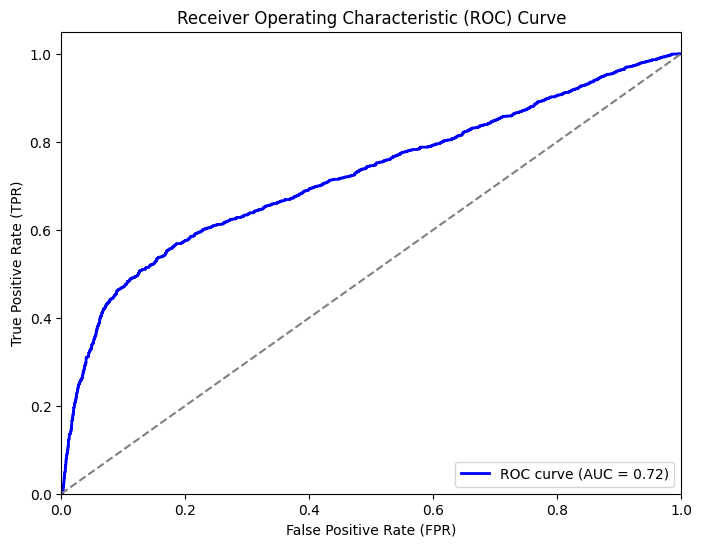

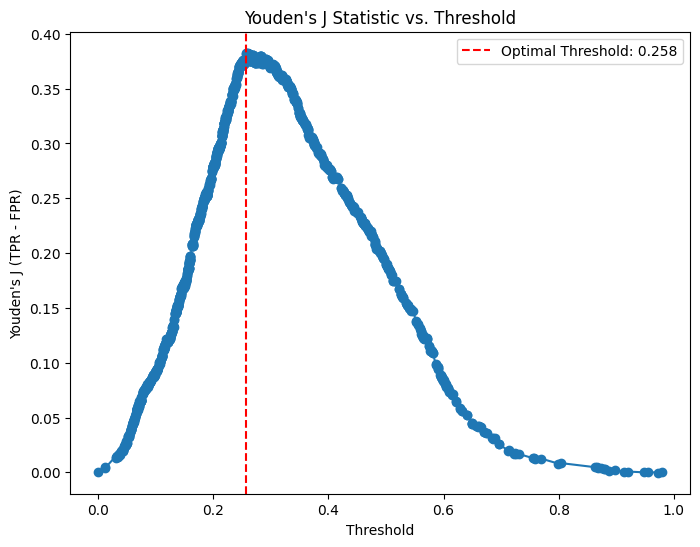

In [29]:
#ROC and AUC
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(thresholds, J, marker='o', linestyle='-')
plt.xlabel("Threshold")
plt.ylabel("Youden's J (TPR - FPR)")
plt.title("Youden's J Statistic vs. Threshold")
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {best_threshold:.3f}')
plt.legend()

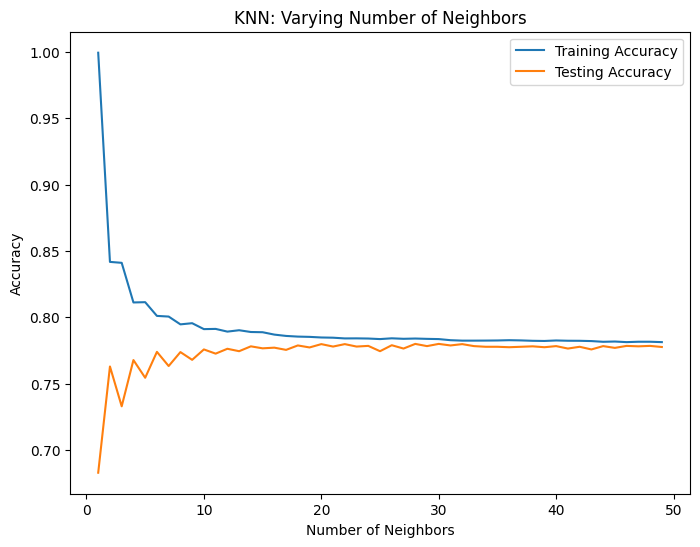

    Train Accuracy  Test Accuracy
1         0.999250       0.683000
2         0.841750       0.763000
3         0.841042       0.733000
4         0.811208       0.767833
5         0.811417       0.754500
6         0.801083       0.774000
7         0.800583       0.763333
8         0.794708       0.773833
9         0.795583       0.768000
10        0.791125       0.775833
11        0.791292       0.772667
12        0.789250       0.776333
13        0.790292       0.774500
14        0.788958       0.778167
15        0.788792       0.776667
16        0.787000       0.777167
17        0.786000       0.775500
18        0.785500       0.778833
19        0.785292       0.777333
20        0.784833       0.779833
21        0.784667       0.778000
22        0.784125       0.779833
23        0.784167       0.778000
24        0.784042       0.778500
25        0.783625       0.774500
26        0.784208       0.779000
27        0.783833       0.776500
28        0.784042       0.780000
29        0.78

In [31]:
#kkn classification
# trying different values for k
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 50)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x1_train, y1_train)
    train_accuracies[neighbor] = knn.score(x1_train, y1_train)
    test_accuracies[neighbor] = knn.score(x1_test, y1_test)
# figure
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
# table
df_acc = pd.DataFrame({
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})
print(df_acc)

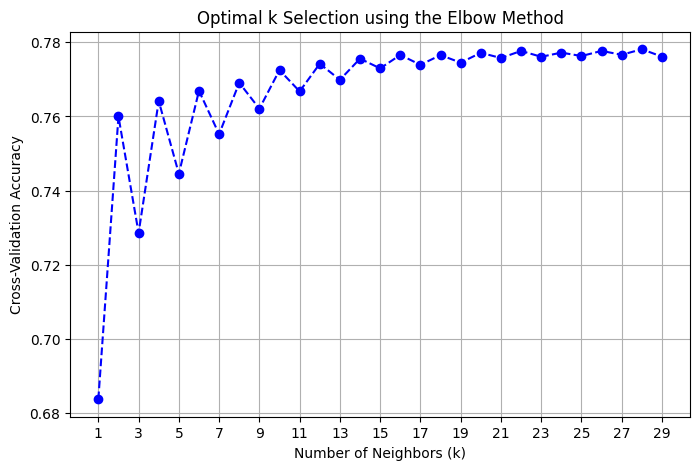

In [34]:
#creating an elbow
k_values = range(1, 30)  # Testing k from 1 to 30
cv_scores = []  # Store cross-validation scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x1_train, y1_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())  # Store mean accuracy
#plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal k Selection using the Elbow Method')
plt.xticks(np.arange(1, 31, step=2))
plt.grid()
plt.show()

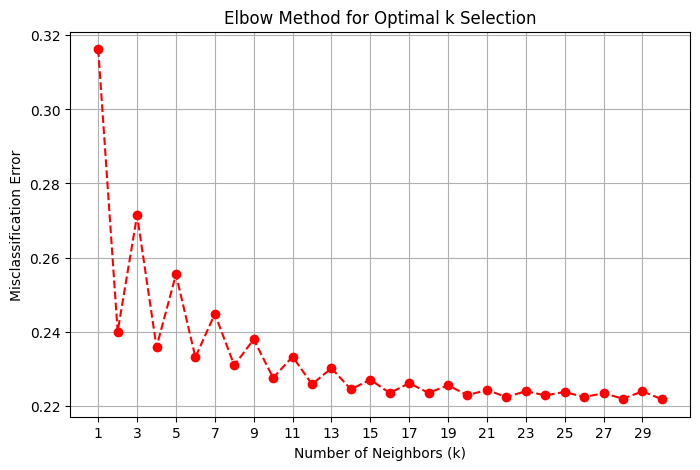

In [33]:
# Try different values of k and record error rates
k_values = range(1, 31)  # Testing k from 1 to 30
error_rates = []  # Store misclassification error

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x1_train, y1_train, cv=5, scoring='accuracy')  # 5-fold CV
    error_rates.append(1 - scores.mean())  # Convert accuracy to error rate

# Plot the error rate
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='r')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('Elbow Method for Optimal k Selection')
plt.xticks(np.arange(1, 31, step=2))
plt.grid()
plt.show()

In [35]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=13)
# Fit the model on training data
knn.fit(x1_train, y1_train)
# Predict on the test data
y2_pred_knn = knn.predict(x1_test)
# Calculate accuracy
accuracy = accuracy_score(y1_test, y2_pred_knn)
print(f"Accuracy: {accuracy}")
# Confusion matrix
conf_matrix = confusion_matrix(y1_test, y2_pred_knn)
print(f"Confusion Matrix:\n{conf_matrix}")
print(classification_report(y1_test, y2_pred_knn))

Accuracy: 0.7745
Confusion Matrix:
[[4523  149]
 [1204  124]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4672
           1       0.45      0.09      0.15      1328

    accuracy                           0.77      6000
   macro avg       0.62      0.53      0.51      6000
weighted avg       0.72      0.77      0.71      6000



In [41]:
#cross k-fold validataion
#The logit k-fold
cv2_results = cross_val_score(knn,x1,y1,cv=kf,scoring='accuracy') #x1, y1, reg have been defined above
print('Cross-fold validation for the knn model:')
print(cv2_results)

Cross-fold validation for the knn model:
[0.7745     0.7635     0.77283333 0.78216667 0.773     ]
